In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Debye model


In [66]:
#Defining constants
R = 2 #Gas constant in cal/molK
kB = (1.380649e-23) #Boltzmann constant (J/K)
hbar = 1.054571817e-34 #Planck constant/2*pi in J*s 

The Debye temperature (TD) for pure Fe is 474 K (Table 3.2, Poirier, 2000). Since it is equal to (h-bar*Debye frequency)/kB. I used that relationship to calculate the Debye frequency (wD) for pure Fe

In [61]:
TD = 474 #K
wD = (TD*kB)/hbar #Hz

In [62]:
T = np.linspace(1,200,50)
w = np.linspace(0,wD,50)

In [63]:
x = (hbar*w)/(kB*T)
Tn = TD/T 


In [67]:
#Defining array to save solution of the integral
inte = np.zeros(len(T))
for i in range(len(T)):

    def integrand(x):

        return ((x**4)*np.exp(x))/((np.exp(x)-1)**2)
    
    inte[i], err = quad(integrand, 0, Tn[i])

#Specific heat at constant volume for pure Fe
Cv = (9*R*(Tn**(-3)))
y = Cv/(3*R)
x = 1/Tn


<ipython-input-67-19a9f77bd198>:7: RuntimeWarning: overflow encountered in double_scalars
  return ((x**4)*np.exp(x))/((np.exp(x)-1)**2)


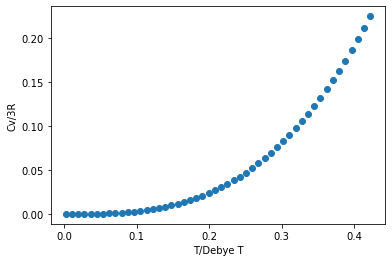

In [69]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel("T/Debye T")
ax.set_ylabel("Cv/3R")
plt.scatter(x,y)